# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [56]:
# Import Library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memmuat dataset
df = pd.read_csv('Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


1. **status_id**:  
   Merupakan jumlah instances atau jumlah status yang diamati
2. **status_type**:  
   Jenis status yang diupload
3. **num_reactions**:  
   Jumlah reactions yang didapat untuk setiap status
4. **num_comments**:  
   Jumlah comments yang diperoleh pada status yang diunggah live sellers di Thailand
5. **num_shares**:  
   Jumlah share yang diperoleh pada status yang diunggah live sellers di Thailand
5. **num_likes**:  
   Jumlah likes yang diperoleh pada status yang diunggah live sellers di Thailand
4. **num_wows, num_hahas, num_sads, num_angrys**:  
   Engagement yang diberikan pada status yang diunggah live sellers di Thailand

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Mengetahui statistik deskriptif dari dataset
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
# Menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
# drop column 1 - column 4
na_column = df[df.columns[12:16]]
df.drop(na_column, axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [7]:
# Menampilkan duplikasi kolom
df.duplicated().sum()

0

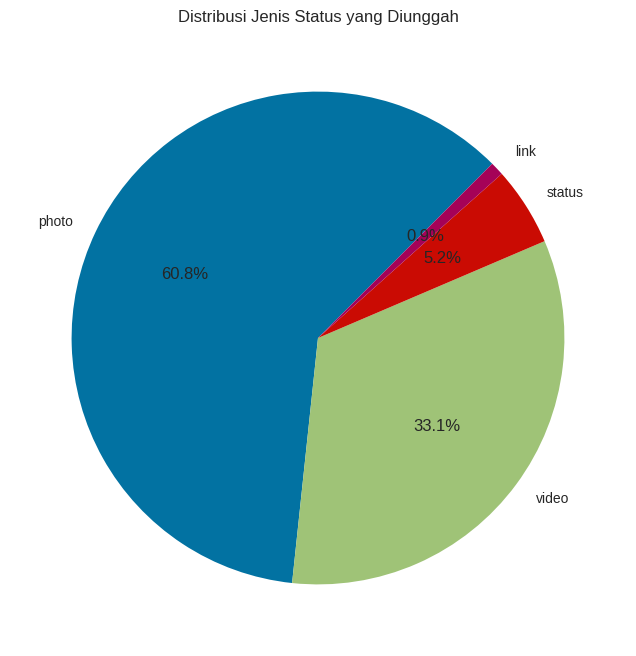

In [8]:
# Menghitung distribusi jenis status yang diunggah
plt.figure(figsize=(8, 8))
plt.pie(df['status_type'].value_counts(), labels=df['status_type'].value_counts().index, autopct='%1.1f%%', startangle=45)
plt.title('Distribusi Jenis Status yang Diunggah')
plt.show()

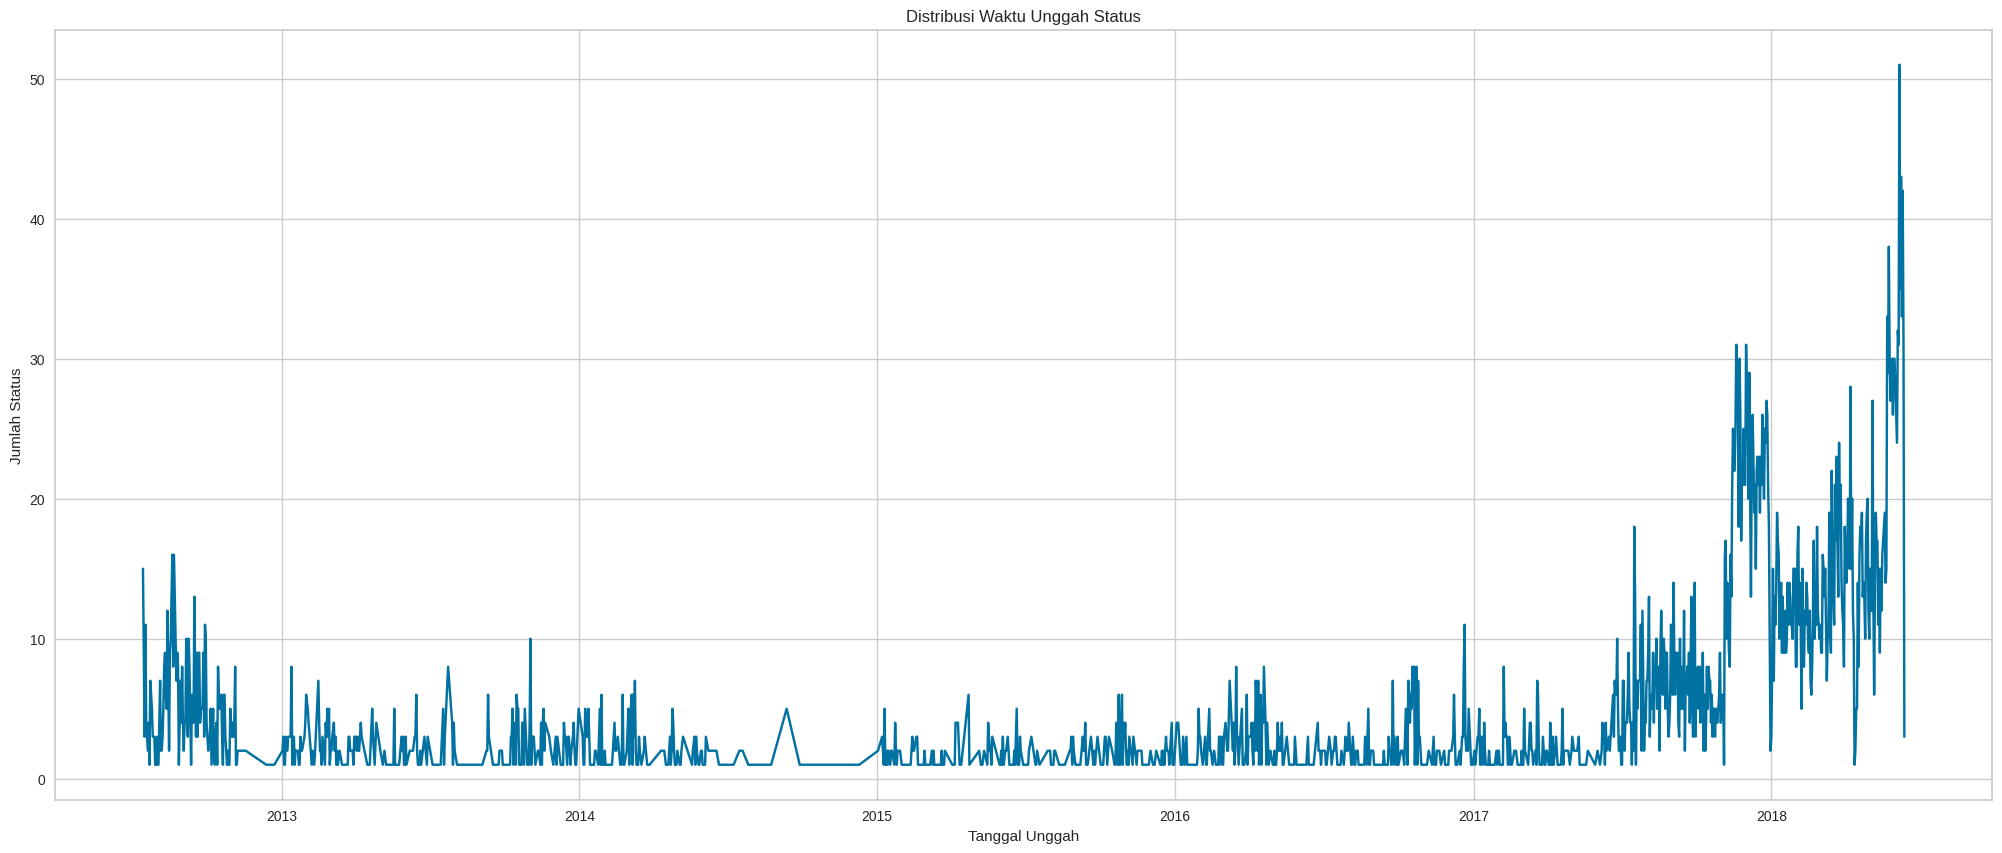

In [9]:
# Distribusi waktu unggah status menggunakan line chart
df['status_published'] = pd.to_datetime(df['status_published'])
df['status_published'] = df['status_published'].dt.date

plt.figure(figsize=(25, 10))
df['status_published'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Tanggal Unggah')
plt.ylabel('Jumlah Status')
plt.title('Distribusi Waktu Unggah Status')
plt.show()

<Figure size 1200x800 with 0 Axes>

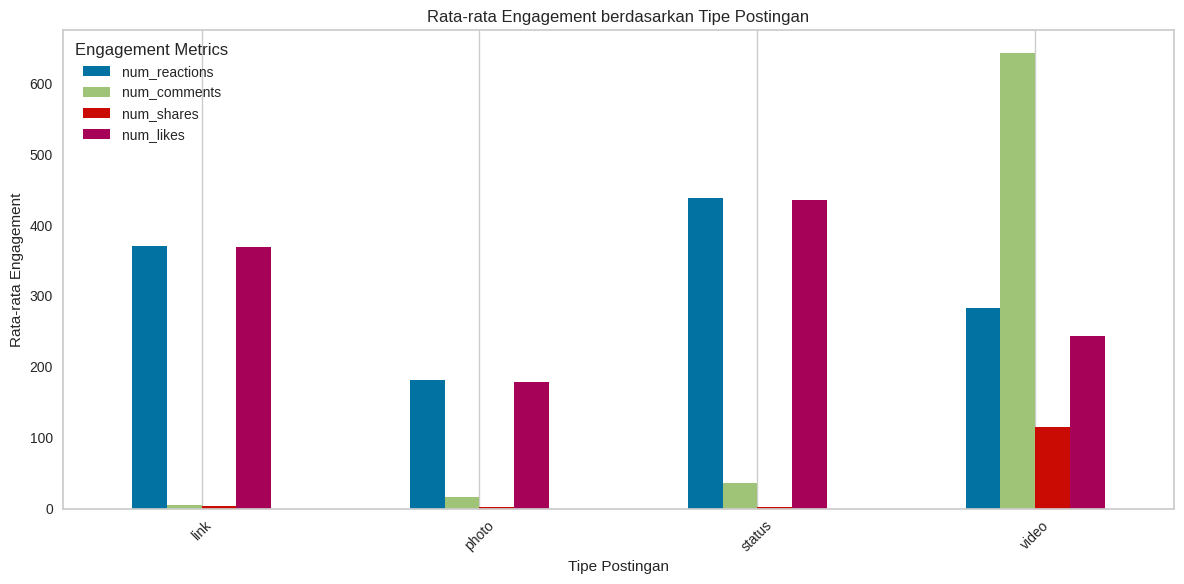

In [10]:
# Menghitun rata-rata engagement per tipe postingan
engagement_by_type = df.groupby('status_type')[[
    'num_reactions', 'num_comments', 'num_shares', 'num_likes',
    'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'
]].mean()

# Visualisasi untuk chart rata-rata engagement
plt.figure(figsize=(12, 8))
engagement_by_type[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Engagement berdasarkan Tipe Postingan')
plt.ylabel('Rata-rata Engagement')
plt.xlabel('Tipe Postingan')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



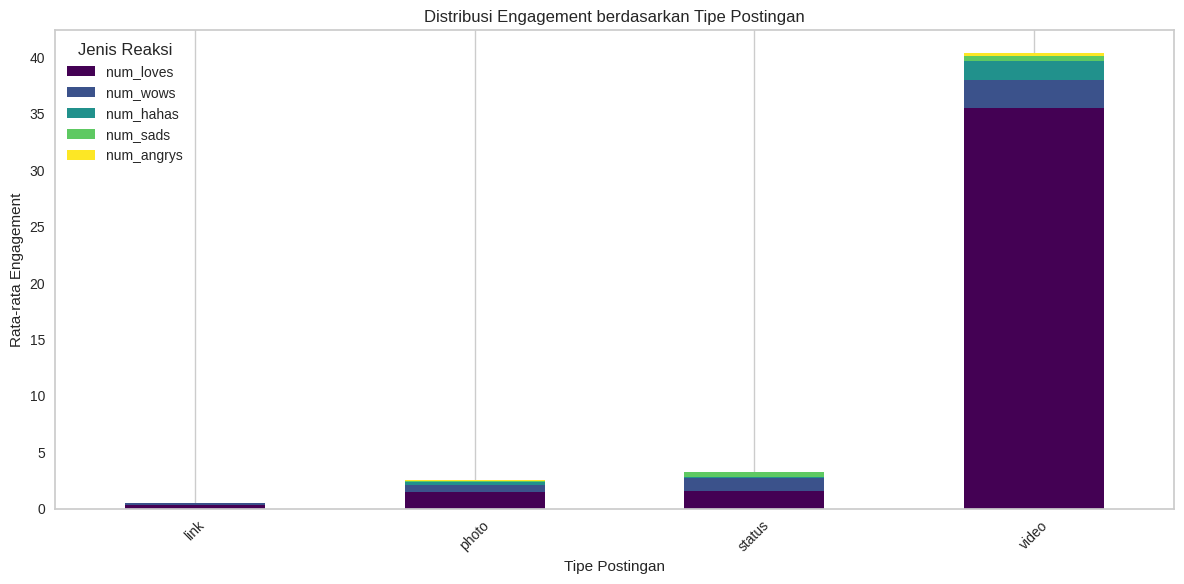

In [11]:
# Visualisasi Distribusi Engagement
engagement_by_type[['num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)
plt.title('Distribusi Engagement berdasarkan Tipe Postingan')
plt.ylabel('Rata-rata Engagement')
plt.xlabel('Tipe Postingan')
plt.xticks(rotation=45)
plt.legend(title='Jenis Reaksi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

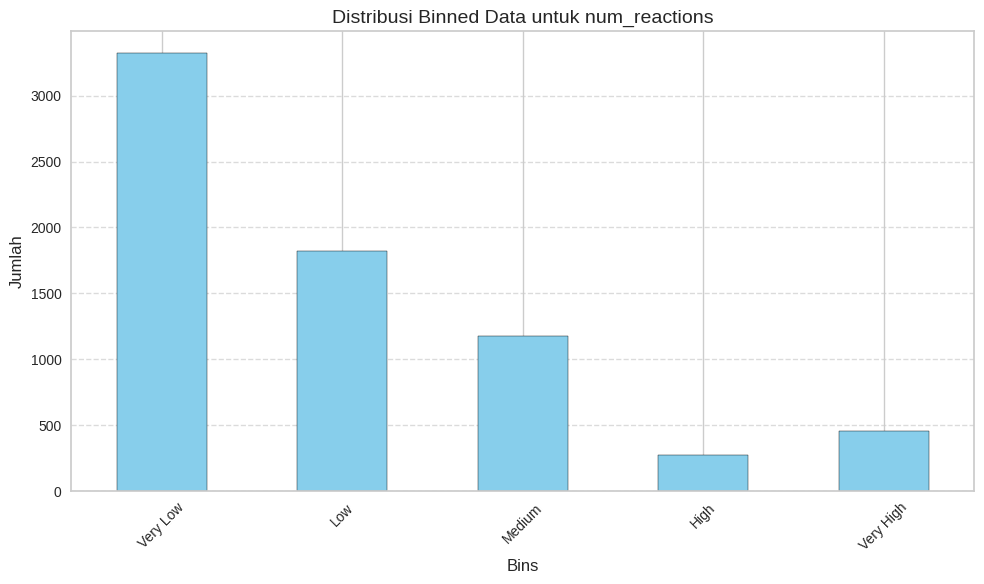

In [12]:
# Binning untuk variabel num_reactions
bin_edges = [0, 50, 200, 500, 1000, float('inf')]
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Binning tanpa menambahkan kolom ke DataFrame
binned_reactions = pd.cut(df['num_reactions'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi bin
bin_distribution = binned_reactions.value_counts().sort_index()

# Visualisasi distribusi bin menggunakan bar chart
plt.figure(figsize=(10, 6))
bin_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Binned Data untuk num_reactions', fontsize=14)
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

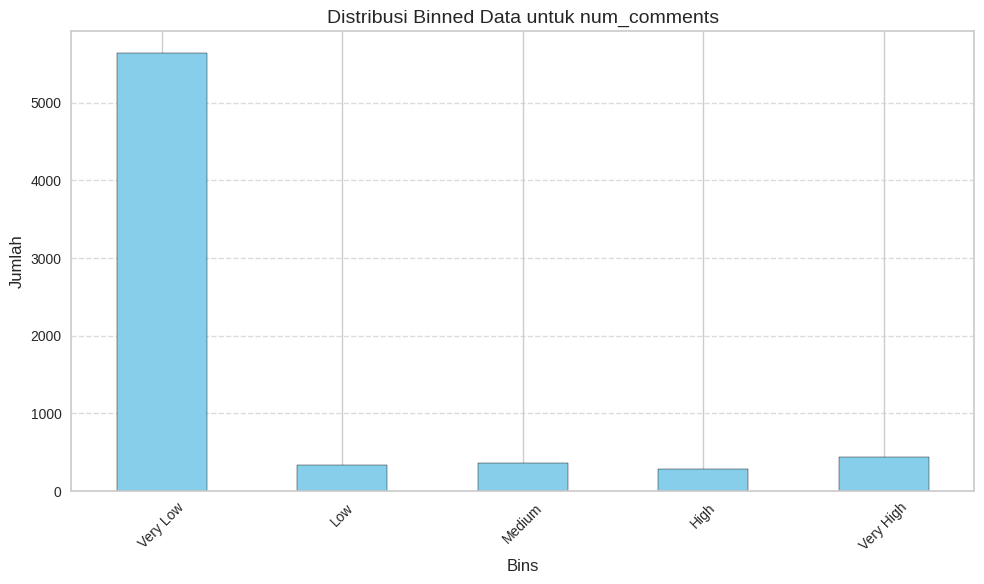

In [13]:
# Binning tanpa menambahkan kolom ke DataFrame
binned_reactions = pd.cut(df['num_comments'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi bin
bin_distribution = binned_reactions.value_counts().sort_index()

# Visualisasi distribusi bin menggunakan bar chart
plt.figure(figsize=(10, 6))
bin_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Binned Data untuk num_comments', fontsize=14)
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

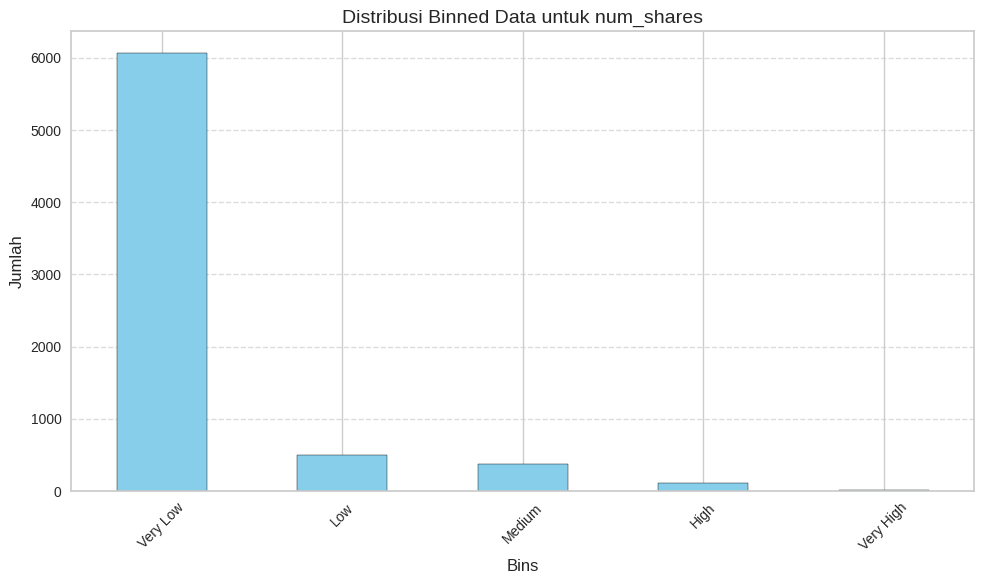

In [14]:
# Binning tanpa menambahkan kolom ke DataFrame
binned_reactions = pd.cut(df['num_shares'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi bin
bin_distribution = binned_reactions.value_counts().sort_index()

# Visualisasi distribusi bin menggunakan bar chart
plt.figure(figsize=(10, 6))
bin_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Binned Data untuk num_shares', fontsize=14)
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

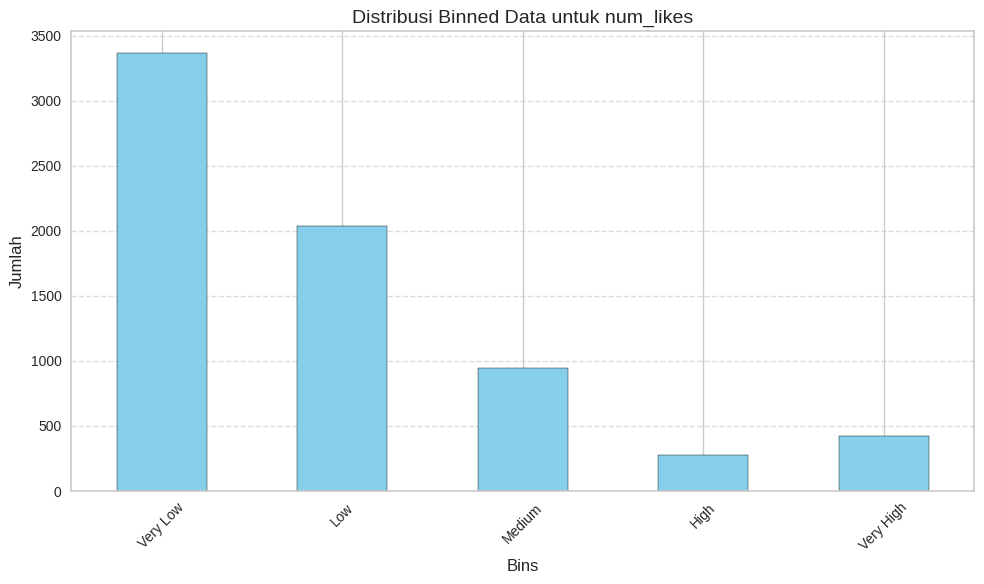

In [15]:
# Binning tanpa menambahkan kolom ke DataFrame
binned_reactions = pd.cut(df['num_likes'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi bin
bin_distribution = binned_reactions.value_counts().sort_index()

# Visualisasi distribusi bin menggunakan bar chart
plt.figure(figsize=(10, 6))
bin_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Binned Data untuk num_likes', fontsize=14)
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18,213,0,0,204,9,0,0,0,0


In [17]:
# menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [18]:
# Mengubah kolom ke datetime langsung di DataFrame
df['status_published'] = pd.to_datetime(df['status_published'])
df['status_published'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_published
Non-Null Count  Dtype         
--------------  -----         
7050 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 55.2 KB


In [19]:
# Cek data duplicated
df.duplicated().sum()

0

In [20]:
# Drop kolom status id
df.drop('status_id', axis=1, inplace=True)

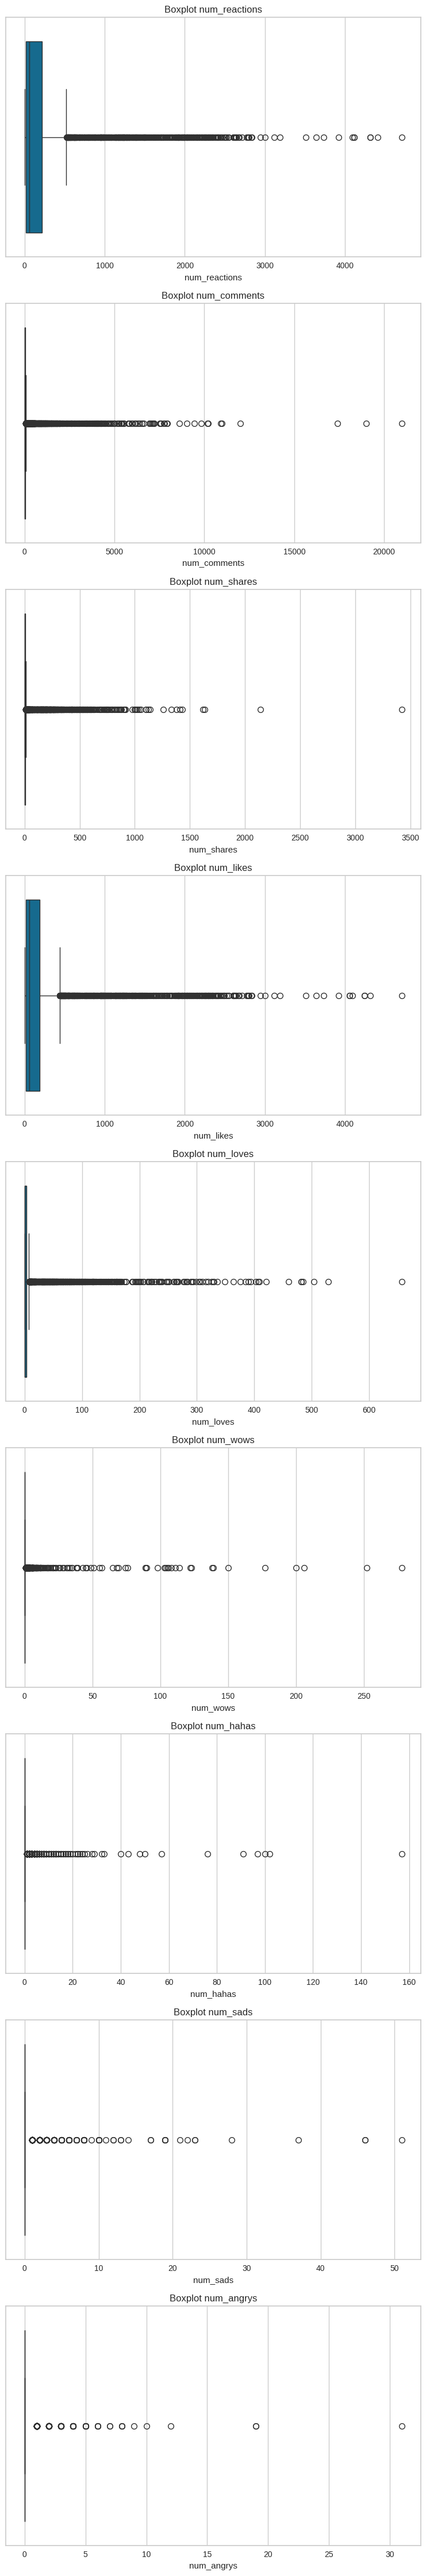

In [21]:
# Analisis untuk distribusi numeric pada dataset
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5*len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [22]:
# Membuat fungsi hapus outlier
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [23]:
# Menghapus outliers
df = remove_outliers_iqr(df, numeric_cols)

In [24]:
# Identifikasi kolom kategorikal dan numerik
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Encoding untuk data kategorikal
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standarisasi untuk data numerik
# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Tampilkan beberapa baris data hasil preprocessing
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,1,2018-04-21,150,0,0,150,0,0,0,0,0
3,1,2018-04-21,111,0,0,111,0,0,0,0,0
23,3,2018-03-20,18,0,0,18,0,0,0,0,0
25,3,2018-03-19,37,0,1,37,0,0,0,0,0
75,3,2018-01-19,35,1,0,35,0,0,0,0,0


In [108]:
# Data splited
X = df.iloc[:, [0, 2, 3, 4, 5]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['status_type', 'Reactions Amount', 'Comments Amount', 'Shares Amount', 'Likes Amount']))

      status_type  Reactions Amount  Comments Amount  Shares Amount  \
0               1               150                0              0   
1               1               111                0              0   
2               3                18                0              0   
3               3                37                0              1   
4               3                35                1              0   
...           ...               ...              ...            ...   
3118            1                 7                0              0   
3119            1                 4                0              0   
3120            1                86                0              0   
3121            1                89                0              0   
3122            1                17                0              0   

      Likes Amount  
0              150  
1              111  
2               18  
3               37  
4               35  
...            ...  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

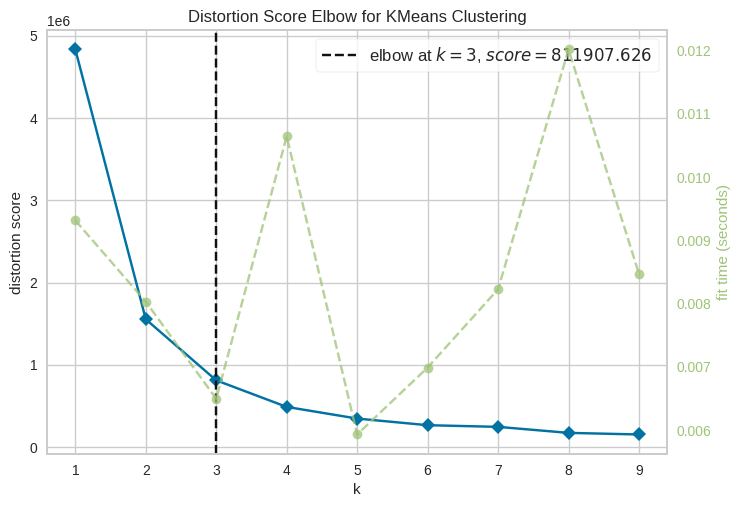

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [110]:
  # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_status = cluster_data[:, 0].mean()  # Rata-rata status
        mean_reactions = cluster_data[:, 1].mean()  # Rata-rata reactions
        mean_comments = cluster_data[:, 2].mean()  # Rata-rata comments
        mean_shares = cluster_data[:, 3].mean()  # Rata-rata share
        mean_likes = cluster_data[:, 4].mean()  # Rata-rata likes

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Status Type: {mean_status:.2f}")
        print(f"Rata-rata Reactions Amount: {mean_reactions:.2f}")
        print(f"Rata-rata Comments Amount): {mean_comments:.2f}")
        print(f"Rata-rata Shares Amounts: {mean_shares:.2f}")
        print(f"Rata-rata Likes Amount: {mean_likes:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Status Type: 1.47
Rata-rata Reactions Amount: 11.32
Rata-rata Comments Amount): 1.63
Rata-rata Shares Amounts: 0.15
Rata-rata Likes Amount: 11.32

Cluster 2:
Rata-rata Status Type: 1.51
Rata-rata Reactions Amount: 102.77
Rata-rata Comments Amount): 7.95
Rata-rata Shares Amounts: 0.35
Rata-rata Likes Amount: 102.77

Cluster 3:
Rata-rata Status Type: 1.22
Rata-rata Reactions Amount: 40.92
Rata-rata Comments Amount): 4.54
Rata-rata Shares Amounts: 0.24
Rata-rata Likes Amount: 40.92


In [111]:
# Menghitung Silhouette Score
sil_score = silhouette_score(X, labels)

# Menampilkan hasil Silhouette Score
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5869


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3123 entries, 1 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       3123 non-null   int64         
 1   status_published  3123 non-null   datetime64[ns]
 2   num_reactions     3123 non-null   int64         
 3   num_comments      3123 non-null   int64         
 4   num_shares        3123 non-null   int64         
 5   num_likes         3123 non-null   int64         
 6   num_loves         3123 non-null   int64         
 7   num_wows          3123 non-null   int64         
 8   num_hahas         3123 non-null   int64         
 9   num_sads          3123 non-null   int64         
 10  num_angrys        3123 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 292.8 KB


In [69]:
df.reset_index(drop=True, inplace=True)

# Pilih kolom dengan tipe data integer
selection_numerical_cols = df.select_dtypes(include=['int64'])

In [70]:
# Memilih k fitur terbaik
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(selection_numerical_cols, labels)

In [71]:
X_new

array([[  1, 150,   0,   0, 150],
       [  1, 111,   0,   0, 111],
       [  3,  18,   0,   0,  18],
       ...,
       [  1,  86,   0,   0,  86],
       [  1,  89,   0,   0,  89],
       [  1,  17,   0,   0,  17]])

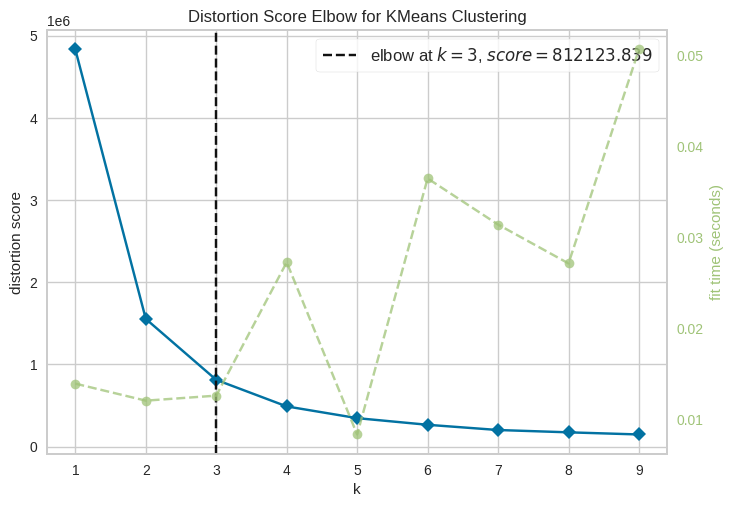

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_new)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [113]:
  # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_new)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_status = cluster_data[:, 0].mean()  # Rata-rata status
        mean_reactions = cluster_data[:, 1].mean()  # Rata-rata reactions
        mean_comments = cluster_data[:, 2].mean()  # Rata-rata comments
        mean_shares = cluster_data[:, 3].mean()  # Rata-rata share
        mean_likes = cluster_data[:, 4].mean()  # Rata-rata likes

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Status Type: {mean_status:.2f}")
        print(f"Rata-rata Reactions Amount: {mean_reactions:.2f}")
        print(f"Rata-rata Comments Amount): {mean_comments:.2f}")
        print(f"Rata-rata Shares Amounts: {mean_shares:.2f}")
        print(f"Rata-rata Likes Amount: {mean_likes:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_new, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Status Type: 1.45
Rata-rata Reactions Amount: 12.08
Rata-rata Comments Amount): 1.73
Rata-rata Shares Amounts: 0.15
Rata-rata Likes Amount: 12.08

Cluster 2:
Rata-rata Status Type: 1.54
Rata-rata Reactions Amount: 106.61
Rata-rata Comments Amount): 8.15
Rata-rata Shares Amounts: 0.35
Rata-rata Likes Amount: 106.61

Cluster 3:
Rata-rata Status Type: 1.24
Rata-rata Reactions Amount: 44.57
Rata-rata Comments Amount): 4.74
Rata-rata Shares Amounts: 0.25
Rata-rata Likes Amount: 44.57


In [114]:
# Menghitung Silhouette Score
sil_score = silhouette_score(X_new, labels)

# Menampilkan hasil Silhouette Score
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6052


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

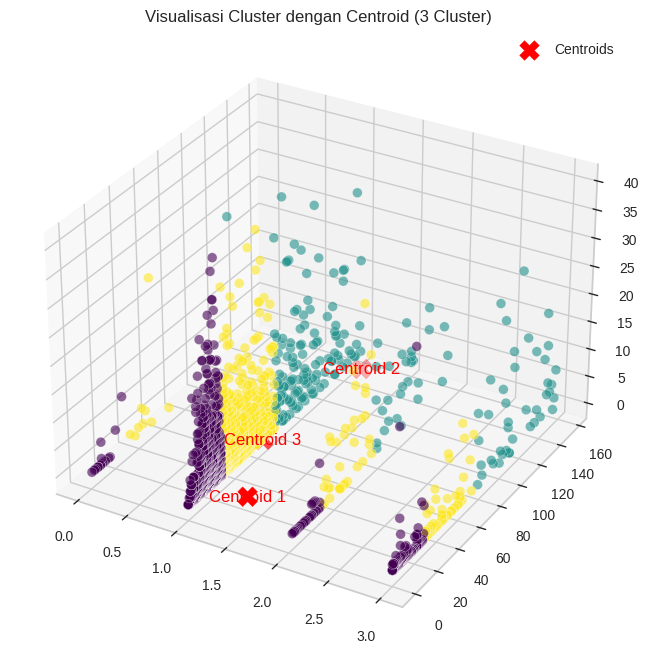

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
ax.set_title('Visualisasi Cluster dengan Centroid (3 Cluster)')
ax.legend()

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [117]:
  # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_new)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_status = cluster_data[:, 0].mean()  # Rata-rata status
        mean_reactions = cluster_data[:, 1].mean()  # Rata-rata reactions
        mean_comments = cluster_data[:, 2].mean()  # Rata-rata comments
        mean_shares = cluster_data[:, 3].mean()  # Rata-rata share
        mean_likes = cluster_data[:, 4].mean()  # Rata-rata likes

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Status Type: {mean_status:.2f}")
        print(f"Rata-rata Reactions Amount: {mean_reactions:.2f}")
        print(f"Rata-rata Comments Amount): {mean_comments:.2f}")
        print(f"Rata-rata Shares Amounts: {mean_shares:.2f}")
        print(f"Rata-rata Likes Amount: {mean_likes:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_new, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Status Type: 1.45
Rata-rata Reactions Amount: 12.08
Rata-rata Comments Amount): 1.73
Rata-rata Shares Amounts: 0.15
Rata-rata Likes Amount: 12.08

Cluster 2:
Rata-rata Status Type: 1.54
Rata-rata Reactions Amount: 106.61
Rata-rata Comments Amount): 8.15
Rata-rata Shares Amounts: 0.35
Rata-rata Likes Amount: 106.61

Cluster 3:
Rata-rata Status Type: 1.24
Rata-rata Reactions Amount: 44.57
Rata-rata Comments Amount): 4.74
Rata-rata Shares Amounts: 0.25
Rata-rata Likes Amount: 44.57


Tulis hasil interpretasinya di sini.
1. Status Type: Rata-rata berada pada nilai 1 yaitu video yang menghasilkan lebih banyak interaksi.
2. Reactions Amount: Cluster 2 memiliki rata-rata jumlah reaksi tertinggi. Ini mungkin menandakan bahwa postingan dalam cluster ini lebih menarik atau lebih relevan.
3. Comments Amount: Cluster 3 memiliki jumlah komentar lebih tinggi dari Cluster 1, tetapi lebih rendah dari Cluster 2. Ini bisa mengindikasikan tingkat diskusi yang sedang.
4. Shares Amounts: Cluster 2 menunjukkan kecenderungan berbagi yang lebih tinggi, meskipun rata-ratanya masih rendah. Ini mungkin karena konten lebih bermanfaat atau menarik.
5. Likes Amount: Nilai yang sama dengan Reactions Amount menunjukkan bahwa "likes" mendominasi jenis reaksi.

1. **Cluster 1**: Keterlibatan Rendah
Cluster ini memiliki rata-rata keterlibatan terendah. Kemungkinan terdiri dari postingan yang kurang menarik perhatian audiens, baik dari sisi konten maupun waktu publikasi.
2. **Cluster 2**: Konten Berkinerja Tinggi
Cluster ini mencerminkan postingan yang sangat berhasil dengan keterlibatan tertinggi dalam reaksi, komentar, dan berbagi.
3. **Cluster 3**: Keterlibatan Sedang
Cluster ini memiliki keterlibatan menengah, menunjukkan potensi yang dapat ditingkatkan. Mungkin terdiri dari konten yang menarik, tetapi kurang optimal dalam hal distribusi atau target audiens.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [118]:
# Menambahkan hasil clustering sebagai kolom baru di DataFrame
df['Cluster'] = labels

# Menampilkan beberapa baris untuk memastikan kolom telah ditambahkan
print(df.head())

   status_type status_published  num_reactions  num_comments  num_shares  \
0            1       2018-04-21            150             0           0   
1            1       2018-04-21            111             0           0   
2            3       2018-03-20             18             0           0   
3            3       2018-03-19             37             0           1   
4            3       2018-01-19             35             1           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  Cluster  
0        150          0         0          0         0           0        1  
1        111          0         0          0         0           0        1  
2         18          0         0          0         0           0        0  
3         37          0         0          0         0           0        2  
4         35          0         0          0         0           0        2  


In [119]:
# Menyimpan DataFrame ke file CSV
df.to_csv('hasil_clustering.csv', index=False)